In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 原始資料


In [9]:
data = pd.read_csv(r'C:\Users\jasonsu\Documents\4.Gitthub\UTaipei\Small task\20190115\AppleStore.csv')
data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# 在Excel篩選
選擇免費：price = 0
平均用戶評分值為0與5：user_rating = 0 & 5
取出「prime_gener」欄位

In [10]:
data = pd.read_csv(r'C:\Users\jasonsu\Documents\4.Gitthub\UTaipei\Small task\20190115\0.csv')
data.head(5)

,prime_genre
0,Finance
1,Book
2,Travel
3,Navigation
4,Education


In [11]:
data = pd.read_csv(r'C:\Users\jasonsu\Documents\4.Gitthub\UTaipei\Small task\20190115\5.csv')
data.head(5)

,prime_genre
0,Utilities
1,Shopping
2,News
3,Photo & Video
4,Utilities


# 計算prime_gener欄位計數
使用shell方式：

* cat 0.csv | awk -F, '{print $1}' | sort | uniq -c | awk -F' ' '{print $1","$2}' >> 0_ok.csv

* cat 5.csv | awk -F, '{print $1}' | sort | uniq -c | awk -F' ' '{print $1","$2}' >> 5_ok.csv

In [13]:
data = pd.read_csv(r'C:\Users\jasonsu\Documents\4.Gitthub\UTaipei\Small task\20190115\0_ok.csv')
data.head(5)

,COUNT,NAME
0,47,Book
1,4,Business
2,5,Catalogs
3,66,Education
4,64,Entertainment


In [15]:
data = pd.read_csv(r'C:\Users\jasonsu\Documents\4.Gitthub\UTaipei\Small task\20190115\5_ok.csv')
data.head(5)

,COUNT,NAME
0,6,Book
1,2,Business
2,1,Catalogs
3,5,Education
4,14,Entertainment


# 合成「0-5.csv」

In [19]:
data = pd.read_csv(r'C:\Users\jasonsu\Documents\4.Gitthub\UTaipei\Small task\20190115\0-5.csv')
data.head(100)

,NAME,COUNT,0,5
0,Book,53,47,6
1,Business,6,4,2
2,Catalogs,6,5,1
3,Education,71,66,5
4,Entertainment,78,64,14
5,Finance,36,33,3
6,Food,13,11,2
7,Games,612,462,150
8,Health,33,21,12
9,Lifestyle,35,31,4


''

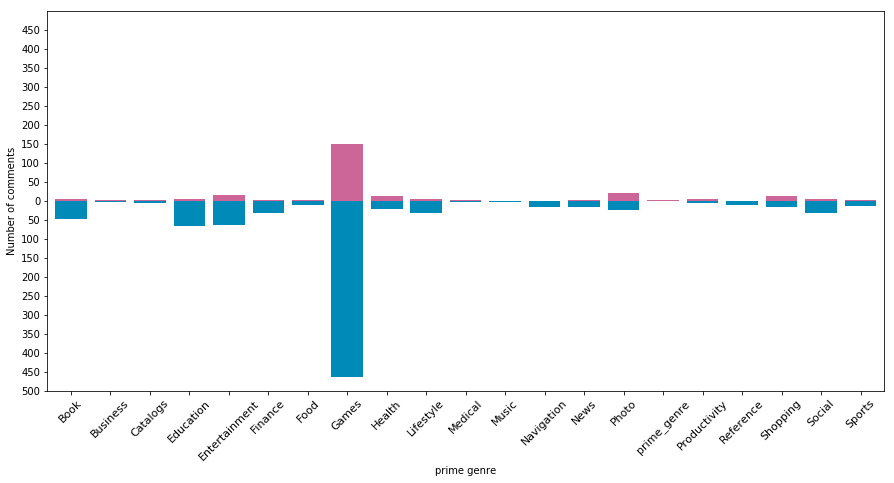

In [22]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

for (i, row) in data.iterrows():
    plt.bar([i, i], [row['5'], -row['0']],
            color=['#CC6699', '#008AB8'], width=0.8, align='center', edgecolor='none')
    
plt.xlim(-0.6, 20.6)
plt.ylim(-500, 500)
#plt.grid(False, axis='x')
plt.xticks(np.arange(0, 21), data['NAME'], fontsize=11, rotation=45)
plt.yticks(np.arange(-500, 500, 50),
           ['{}'.format(int(abs(x))) if x != 0 else 0 for x in np.arange(-500, 500, 50)])
plt.xlabel('prime genre')
plt.ylabel('Number of comments')

plt.savefig('ya.pdf')
;